# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Caminhos para os arquivos CSV filtrados
X_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv"
y_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt"
X_test_path = "/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv"
y_test_path = "/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt"

# Carregar as bases
X_train = pd.read_csv(X_train_path, index_col=[0, 1])  # Carregar X_train com índice duplo (se necessário)
y_train = pd.read_csv(y_train_path, header=None)       # Carregar y_train sem índice específico
X_test = pd.read_csv(X_test_path, index_col=[0, 1])    # Carregar X_test com índice duplo (se necessário)
y_test = pd.read_csv(y_test_path, header=None)         # Carregar y_test sem índice específico

# Exibir informações básicas para confirmar o carregamento
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())


X_train:
               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order subject                                                         
0     1                 0.288585          -0.020294          -0.132905
1     1                 0.278419          -0.016411          -0.123520
2     1                 0.279653          -0.019467          -0.113462
3     1                 0.279174          -0.026201          -0.123283
4     1                 0.276629          -0.016570          -0.115362

y_train:
   0
0  5
1  5
2  5
3  5
4  5

X_test:
               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order subject                                                         
0     2                 0.257178          -0.023285          -0.014654
1     2                 0.286027          -0.013163          -0.119083
2     2                 0.275485          -0.026050          -0.118152
3     2                 0.270298          -0.032614          -0.117520
4     2            

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [3]:

# Caminhos para os arquivos CSV filtrados
X_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv"
y_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt"
X_test_path = "/Users/samwalford/Downloads/UCI HAR Dataset/test/X_test_filtered.csv"
y_test_path = "/Users/samwalford/Downloads/UCI HAR Dataset/test/y_test.txt"

# Carregar as bases
X_train = pd.read_csv(X_train_path, index_col=[0, 1])  # Carregar X_train com índice duplo (se necessário)
y_train = pd.read_csv(y_train_path, header=None)       # Carregar y_train sem índice específico
X_test = pd.read_csv(X_test_path, index_col=[0, 1])    # Carregar X_test com índice duplo (se necessário)
y_test = pd.read_csv(y_test_path, header=None)         # Carregar y_test sem índice específico

# Exibir informações básicas para confirmar o carregamento
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())
print("\nX_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())


X_train:
               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order subject                                                         
0     1                 0.288585          -0.020294          -0.132905
1     1                 0.278419          -0.016411          -0.123520
2     1                 0.279653          -0.019467          -0.113462
3     1                 0.279174          -0.026201          -0.123283
4     1                 0.276629          -0.016570          -0.115362

y_train:
   0
0  5
1  5
2  5
3  5
4  5

X_test:
               tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z
order subject                                                         
0     2                 0.257178          -0.023285          -0.014654
1     2                 0.286027          -0.013163          -0.119083
2     2                 0.275485          -0.026050          -0.118152
3     2                 0.270298          -0.032614          -0.117520
4     2            

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Caminhos para os arquivos CSV filtrados
X_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/X_train_filtered.csv"
y_train_path = "/Users/samwalford/Downloads/UCI HAR Dataset/train/y_train.txt"

# Carregar as bases
X_train = pd.read_csv(X_train_path, index_col=[0, 1])  # Defina o índice duplo, se necessário
y_train = pd.read_csv(y_train_path, header=None)       # Carregar y_train sem cabeçalho

# Dividir a base de treino em 75% treino e 25% validação
X_train_reduced, X_validation, y_train_reduced, y_validation = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42
)

# Criar e treinar uma árvore de decisão com profundidade máxima igual a 4
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train_reduced, y_train_reduced)

# Obter a importância das variáveis
importances = clf.feature_importances_

# Organizar as importâncias em um DataFrame para facilitar a visualização
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Ordenar as variáveis por importância, em ordem decrescente
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Selecionar as 3 variáveis mais importantes
top_3_features = feature_importances.head(3)
print("As 3 variáveis mais importantes:")
print(top_3_features)



As 3 variáveis mais importantes:
             Feature  Importance
0  tBodyAcc-mean()-X    0.712110
1  tBodyAcc-mean()-Y    0.222871
2  tBodyAcc-mean()-Z    0.065019


### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [6]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Supondo que 'top_3_features' contém os nomes das 3 variáveis mais importantes
# Filtrar os dados de treino e validação para usar apenas essas 3 variáveis
X_train_top3 = X_train_reduced[top_3_features['Feature']]
X_validation_top3 = X_validation[top_3_features['Feature']]

# Ajustar uma árvore inicial para obter o caminho de poda de complexidade (ccp_alpha)
clf = DecisionTreeClassifier(random_state=42, min_samples_leaf=20)
clf.fit(X_train_top3, y_train_reduced)

# Obter os valores de ccp_alpha e o caminho de poda
path = clf.cost_complexity_pruning_path(X_train_top3, y_train_reduced)
ccp_alphas = path.ccp_alphas

# Listas para armazenar as árvores e as acurácias de validação
trees = []
validation_accuracies = []

# Loop para ajustar uma árvore para cada valor de ccp_alpha
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha, min_samples_leaf=20)
    clf.fit(X_train_top3, y_train_reduced)
    trees.append(clf)
    
    # Prever na base de validação e calcular a acurácia
    y_validation_pred = clf.predict(X_validation_top3)
    accuracy = accuracy_score(y_validation, y_validation_pred)
    validation_accuracies.append(accuracy)

# Identificar o melhor valor de ccp_alpha com base na acurácia de validação
best_alpha_index = np.argmax(validation_accuracies)
best_alpha = ccp_alphas[best_alpha_index]
best_tree = trees[best_alpha_index]

print("Melhor valor de ccp_alpha:", best_alpha)
print("Acurácia na base de validação:", validation_accuracies[best_alpha_index])



Melhor valor de ccp_alpha: 0.0007896399050466765
Acurácia na base de validação: 0.4619151251360174


In [7]:
# O código acima
%%time



CPU times: user 6 µs, sys: 7 µs, total: 13 µs
Wall time: 26 µs


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [8]:
from sklearn.metrics import accuracy_score

# Filtrar a base de teste para usar apenas as 3 variáveis mais importantes
X_test_top3 = X_test[top_3_features['Feature']]

# Fazer previsões na base de teste usando a melhor árvore encontrada
y_test_pred = best_tree.predict(X_test_top3)

# Calcular a acurácia na base de teste
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Acurácia do modelo na base de teste:", test_accuracy)


Acurácia do modelo na base de teste: 0.44044791313199866


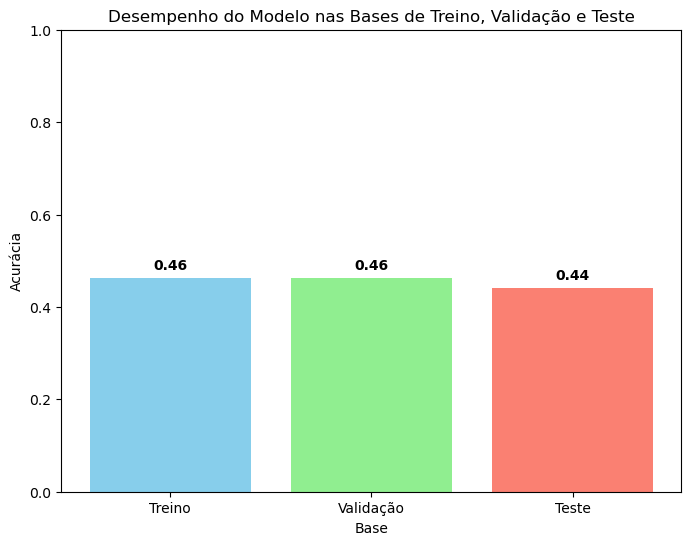

In [9]:
import matplotlib.pyplot as plt

# Supondo que você tenha as seguintes acurácias:
train_accuracy = max(validation_accuracies)  # ou use a acurácia de treino da árvore com o melhor ccp_alpha
validation_accuracy = validation_accuracies[best_alpha_index]  # acurácia na base de validação
test_accuracy = test_accuracy  # acurácia na base de teste calculada no passo anterior

# Criação do gráfico
plt.figure(figsize=(8, 6))
accuracy_values = [train_accuracy, validation_accuracy, test_accuracy]
labels = ['Treino', 'Validação', 'Teste']

plt.bar(labels, accuracy_values, color=['skyblue', 'lightgreen', 'salmon'])
plt.xlabel("Base")
plt.ylabel("Acurácia")
plt.title("Desempenho do Modelo nas Bases de Treino, Validação e Teste")
plt.ylim(0, 1)  # define a escala de 0 a 1 para a acurácia

# Exibir o valor da acurácia em cada barra
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()
